# Mixed Strategy Nash Equilibria

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import nashpy as n 

# user written 
import bimatrix

# 2x2 Games

Here is an example of a game to work with to fix ideas. 

In [2]:
U1 = np.array([
    [1,1],
    [1,5]
])
U2 = np.array([
    [3,0],
    [1,5]
])
bimatrix.print_payoffs(U1, U2, A1=['U','D'], A2=['L','R'])

,L,R
U,"(1, 3)","(1, 0)"
D,"(1, 1)","(5, 5)"


In a binary game, the mixed strategy of each player is a vector $(p_1,p_2)$. But since the probabilities must sum to 100%, we can think of it as a choosing a single number, $p_1$ (the probability of choosing the first action), and then the other probability is just $1-p_1$. This is why we can make simple plots: there is just one continuous choice variable for each player: the probability of playing her first action. 

The strategy space is thus the unit interval, $S_i = [0;1]$. 

If we have a candidate strategy for our opponent, $s_2 = (p_2, 1-p_2)$, then we can calculate the expected utility we get from both of our actions. This is just $p_2$ times the utility evaluated when the opponent plays the first action plus $1-p_2$ times the probability when she chooses the second action. In other words,

In [3]:
p2 = 0.25 # some strategy our opponent might choose 
Eu1 = p2 * U1[:, 0] + (1-p2) * U1[:, 1]
Eu1

array([1., 4.])

Let's get clever and use matrix algebra to do this: 

In [4]:
p2vec = np.array([p2, 1.0-p2])
Eu1 = U1 @ p2vec
Eu1

array([1., 4.])

Phew, it gave the same result...

Now we have two expected utility values. Agents are rational so they pick the one that gives the highest utility: that is the second action. We can use `np.argmax` to find this index. 

In [5]:
br1 = Eu1.argmax()
br1

1

The second action gave utility 3.25



Now let's do this for a lot of candidate strategy vectors our opponent might choose: a whole grid over $[0;1]$, e.g. for 100 values: 

In [6]:
# create a grid of probabilities to plot over
p = np.linspace(0,1,100)
pp = np.hstack([p, 1-p]).reshape(2,100) # top row is Pr(first action), bottom row is Pr(second action)
pp[:, :3] # show what we are dealing with 

array([[0.        , 0.01010101, 0.02020202],
       [1.        , 0.98989899, 0.97979798]])

In [7]:
Eu1 = U1 @ pp
Eu1[:, :3] # printing some of the expected utilities 

array([[1.        , 1.        , 1.        ],
       [5.        , 4.95959596, 4.91919192]])

Agents may choose to mix if they are indifferent. Let's see if that ever happens: 

In [8]:
I = np.isclose(Eu1[0,:], Eu1[1,:])
if I.any():
    idx = np.where(I)
    print(idx,Eu1[:, idx].flatten())
else: 
    print('no match')

(array([99]),) [1. 1.]


So for ther 99th action (the last in our grid, so when $p_2 = 1.0$), the first player is indifferent (to numerical precision) about her actions. Then, that is where she is willing to mix.     

### Best response function

For binary games (where there are just two actions to mix over, $|S_i| = 2$), the expected utility must be weakly monotonic in the opponent's choice probability. 

First, without loss of generality, define $p_i = \Pr(\text{player } i \text{ plays } a_i^0)$ and then $1-p_i$ is the probability that the "other" (second) action is played. Then, expected utility is 
$$E_{a_2}(u_1(a_1, a_2)) = p_2 u_1(a_1, 0) + (1-p_2) u_1(a_1, 1).$$

Typically, we get 
$$ BR_1(p_2) = 
\begin{cases}
\{0\} & \text{if } p_2 \in \mathcal{A} \\
[0;1] & \text{if } p_2 \in \mathcal{B} \\
\{1\} & \text{if } p_2 \in \mathcal{C},
\end{cases} 
$$
where $\mathcal{A}, \mathcal{B}, \mathcal{C} \subset [0;1]$. In this case, $BR_1(p_2)$ gives the "mixing probability", $p_1$, that player 1 will play it's first (of two) actions. 

In [9]:
def BR_1(Eu1): 
    '''Best response in binary actions 
    Input: Eu1: 2*G matrix of expected utilities, where 
        2 = number of actions 
        G = number of grid points we are computing the best response for 
    Output: 
        br: G-vector of flots
    '''
    x,G = Eu1.shape
    assert x == 2, f'Eu must be 2*G'
    
    br = np.empty((G,)) # one best response per grid point
    
    I = Eu1[0,:] > Eu1[1,:] # in these rows, the 
    br[I] = [] # FILL IN
    I = Eu1[0,:] < Eu1[1,:]
    br[I] = [] # FILL IN
    I = Eu1[0,:] == Eu1[1,:]
    br[I] = [] # FILL IN 
    
    return br

In [10]:
Eu1 = [] # FILL IN: Use linear algebra to compute the expected utility to player 1 if player 2 follows each of the strategies in the matrix pp
br1 = BR_1([]) # FILL IN: Best response 
br1

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

In [11]:
Eu2 = [] # Fill in: using linear algebra, compute expected utility to player 2 if player 1 follows pp

br2 = BR_1([]) # Fill in: how can we use BR_1 to compute the best response for player 2? 
br2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

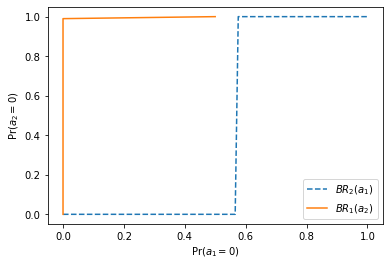

In [12]:
fig,ax = plt.subplots()
ax.plot(p, br2, '--', label=f'$BR_2(a_1)$');
ax.plot(br1, p, '-', label=f'$BR_1(a_2)$');
ax.legend();
ax.set_xlabel('$\Pr(a_1 = 0)$');
ax.set_ylabel('$\Pr(a_2 = 0)$');

Clearly, the plot is improved by adding the point (1,1) to BR1: 

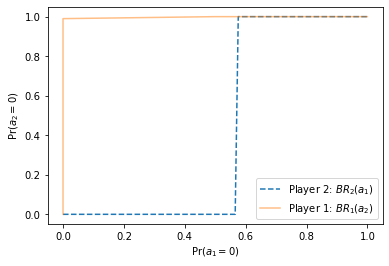

In [13]:
fig,ax = plt.subplots()
ax.plot(p, br2, '--', label=f'Player 2: $BR_2(a_1)$');
ax.plot(
    np.append(br1, 1.0), # <-- add x=1.0 in the end
    np.append(p, 1.0),   # <-- and y=1.0
    '-', label=f'Player 1: $BR_1(a_2)$', alpha=0.5);
ax.legend();
ax.set_xlabel('$\Pr(a_1 = 0)$');
ax.set_ylabel('$\Pr(a_2 = 0)$');

# Solve the game using `nashpy`

In [22]:
g = n.Game(U1,U2)
g

Zero sum game with payoff matrices:

Row player:
[[ 1 -1]
 [-1  1]]

Column player:
[[-1  1]
 [ 1 -1]]

Now solve the game using the object `g`'s builtin function `lemke_howson_enumeration()`. Note that it returns a `generator`, which has to be instantiated, e.g. by looping through it or by materializing it using `list(generator)`. 

You can use it to add the dots for the MSNE on top of your Best Response graphs like this.... but don't waste all the exercise time pursuing this! 

In [ ]:
def plot_BR_functions_2x2(U1, U2):
    # FILL IN if you have the time and feel like it 
    return False 

        L       R
T  (0, 0)  (0, 0)
D  (0, 0)  (1, 1)
Found 4 equilibria:
1: (array([1., 0.]), array([1., 0.]))
2: (array([0., 1.]), array([0., 1.]))
3: (array([1., 0.]), array([1., 0.]))
4: (array([0., 1.]), array([0., 1.]))


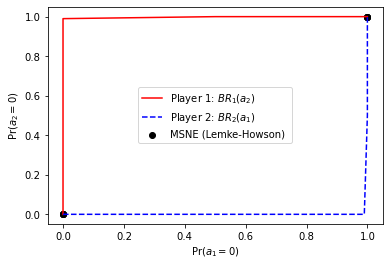

In [16]:
U1 = np.array([[0,0],[0,1]])
U2 = U1.copy()
print(bimatrix.print_payoffs(U1, U2,A1=['T','D'],A2=['L','R']))

plot_BR_functions_2x2(U1, U2)

So the equilibria are just the two pure strategy equilibria: (D,L) and (T,R). 

        L       R
T  (1, 3)  (1, 0)
D  (1, 1)  (5, 5)
Found 4 equilibria:
1: (array([1., 0.]), array([1., 0.]))
2: (array([0., 1.]), array([0., 1.]))
3: (array([1., 0.]), array([1., 0.]))
4: (array([0., 1.]), array([0., 1.]))


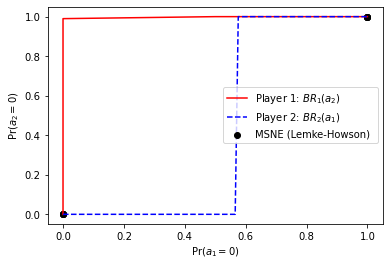

In [17]:
U1 = np.array([[1,1],[1,5]])
U2 = np.array([[3,0],[1,5]])
print(bimatrix.print_payoffs(U1, U2,A1=['T','D'],A2=['L','R']))

plot_BR_functions_2x2(U1, U2)

        0       1
0  (3, 2)  (1, 2)
1  (0, 1)  (1, 2)
Found 4 equilibria:
1: (array([1., 0.]), array([1., 0.]))
2: (array([1., 0.]), array([1., 0.]))
3: (array([1., 0.]), array([1., 0.]))
4: (array([1., 0.]), array([1., 0.]))


/Users/mrz577/opt/anaconda3/lib/python3.9/site-packages/nashpy/integer_pivoting/integer_pivoting.py:55: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])


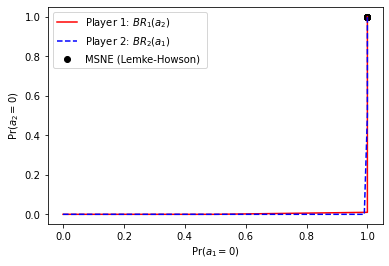

In [18]:
U1 = np.array([[3,1],[0,1]])
U2 = np.array([[2,2],[1,2]])
print(bimatrix.print_payoffs(U1, U2))

plot_BR_functions_2x2(U1, U2)

/Users/mrz577/opt/anaconda3/lib/python3.9/site-packages/nashpy/integer_pivoting/integer_pivoting.py:55: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])


Found 4 equilibria:
1: (array([1., 0.]), array([1., 0.]))
2: (array([1., 0.]), array([1., 0.]))
3: (array([1., 0.]), array([1., 0.]))
4: (array([1., 0.]), array([1., 0.]))
Found 4 equilibria:
1: (array([1., 0.]), array([1., 0.]))
2: (array([1., 0.]), array([1., 0.]))
3: (array([1., 0.]), array([1., 0.]))
4: (array([1., 0.]), array([1., 0.]))


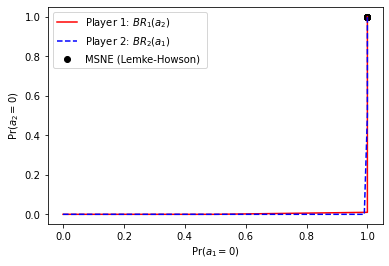

In [19]:
plot_BR_functions_2x2(U1, U2)
eqs = solve_for_MSNE(U1, U2, DOPLOT=False)

        0       1
0  (2, 1)  (3, 0)
1  (1, 2)  (4, 3)
Found 4 equilibria:
1: (array([1., 0.]), array([1., 0.]))
2: (array([0., 1.]), array([0., 1.]))
3: (array([1., 0.]), array([1., 0.]))
4: (array([0., 1.]), array([0., 1.]))


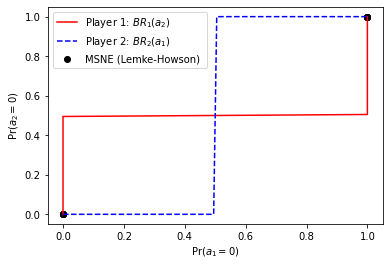

In [20]:
# Reduced 3x2 (we start by removing a dominated option, the third action for player 1)
# then the game is just 2x2
U1 = np.array([[2,3],[1,4]])
U2 = np.array([[1,0],[2,3]])
print(bimatrix.print_payoffs(U1, U2))

plot_BR_functions_2x2(U1, U2)

         0        1
0  (1, -1)  (-1, 1)
1  (-1, 1)  (1, -1)
Found 4 equilibria:
1: (array([0.5, 0.5]), array([0.5, 0.5]))
2: (array([0.5, 0.5]), array([0.5, 0.5]))
3: (array([0.5, 0.5]), array([0.5, 0.5]))
4: (array([0.5, 0.5]), array([0.5, 0.5]))


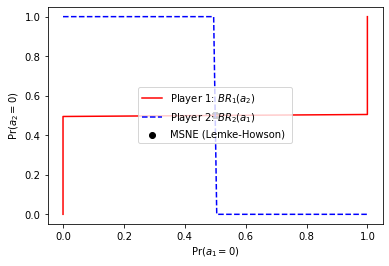

In [21]:
# Matching pennies 
U1 = np.array([[1,-1],[-1,1]])
U2 = np.array([[-1,1],[1,-1]])
print(bimatrix.print_payoffs(U1, U2))

plot_BR_functions_2x2(U1, U2)